# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [83]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [84]:
len(reviews)

25000

In [85]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [86]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [87]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [88]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [89]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [90]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for idx, text in enumerate(reviews):
    words = text.split(' ')
    for word in words:
        if labels[idx] == 'POSITIVE':
            positive_counts[word] += 1
        else:
            negative_counts[word] += 1
        total_counts[word] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [91]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [92]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [93]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
for word in total_counts.keys():
    if total_counts[word] >= 100:
        pos_neg_ratios[word] = positive_counts[word] / float(negative_counts[word] + 1)

Examine the ratios you've calculated for a few words:

In [94]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [95]:
# TODO: Convert ratios to logs
for word in pos_neg_ratios.keys():
    ratio = pos_neg_ratios[word]
    if ratio > 1:
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1/(ratio + 0.01)))

Examine the new ratios you've calculated for the same words from before:

In [96]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.6742829939664696


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [97]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [98]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

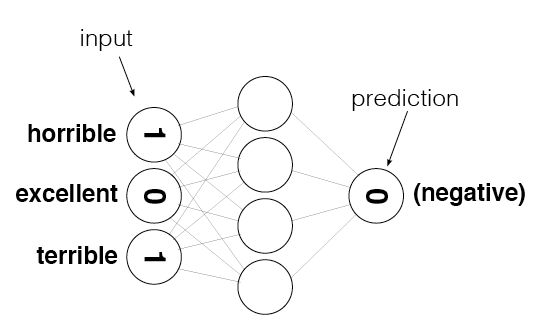

In [99]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

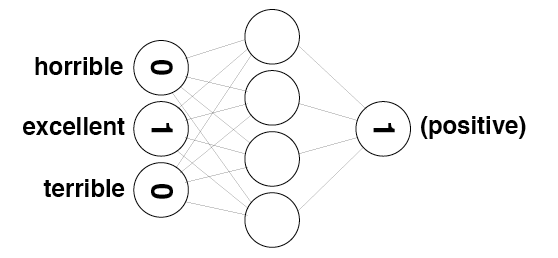

In [100]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [101]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = { x for x in total_counts.keys() }

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [102]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

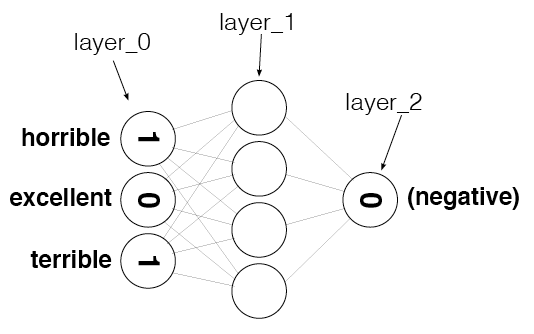

In [103]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [104]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros((1, vocab_size))

Run the following cell. It should display `(1, 74074)`

In [105]:
layer_0.shape

(1, 74074)

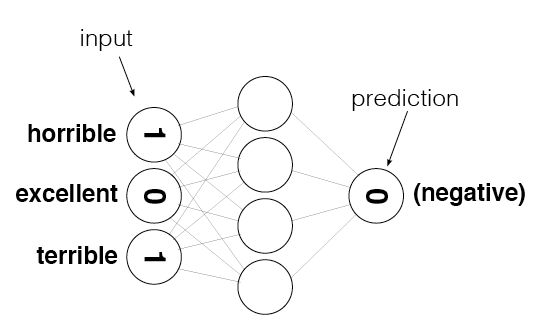

In [106]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [107]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'grindhouses': 1,
 'fleas': 2,
 'cradle': 3,
 'teamsters': 4,
 'favourtie': 5,
 'lensing': 6,
 'ize': 7,
 'greatfully': 8,
 'michener': 9,
 'conveyor': 10,
 'taboo': 11,
 'montorsi': 12,
 'hahahahaha': 13,
 'conceptual': 14,
 'dismissably': 15,
 'womaniser': 16,
 'meting': 17,
 'nero': 18,
 'lectures': 19,
 'perrier': 20,
 'dostoyevskian': 21,
 'alotta': 22,
 'viciente': 23,
 'sabotaged': 24,
 'whinny': 25,
 'playmobil': 26,
 'hubris': 27,
 'charnier': 28,
 'triumf': 29,
 'ode': 30,
 'methodist': 31,
 'cyberpunk': 32,
 'vivir': 33,
 'sec': 34,
 'imbued': 35,
 'joely': 36,
 'nilsson': 37,
 'behavior': 38,
 'tetsuo': 39,
 'instruction': 40,
 'absolved': 41,
 'spewings': 42,
 'doofuses': 43,
 'perniciously': 44,
 'bagged': 45,
 'wobbles': 46,
 'santons': 47,
 'autopsies': 48,
 'homesteader': 49,
 'couldn': 50,
 'immersive': 51,
 'emasculate': 52,
 'offisde': 53,
 'implements': 54,
 'subtly': 55,
 'rotorscoped': 56,
 'stalled': 57,
 'misquotes': 58,
 'tron': 59,
 'inert': 60,
 'ja

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [121]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 
    words = review.split(' ')
    for word in words:
        idx = word2index[word]
        layer_0[:,idx] += 1

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [122]:
update_input_layer(reviews[0])
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [126]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    return 1 if label == 'POSITIVE' else 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [127]:
labels[0]

'POSITIVE'

In [128]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [129]:
labels[1]

'NEGATIVE'

In [130]:
get_target_for_label(labels[1])

0

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [266]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for text in reviews:
            words = text.split(' ')
            for word in words:
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for idx, vocab in enumerate(self.review_vocab):
            self.word2index[vocab] = idx 
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for idx, label in enumerate(self.label_vocab):
            self.label2index[label] = idx
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((input_nodes, hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.randn(hidden_nodes, output_nodes)
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        self.layer_0 *= 0
        
        l0_length = len(self.layer_0)
        for text in review:
            words = text.split(' ')
            for word in words:
                if l0_length < self.word2index[word]:
                    self.layer_0[0, self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        return self.label2index[label]
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output*(1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()
        
        n_records = len(training_reviews)

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            self.update_input_layer(training_reviews[i])
            y = self.get_target_for_label(training_labels[i])
            
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            layer_1_input = np.matmul(self.weights_0_1.T, self.layer_0.T)
            layer_1_output = layer_1_input
            layer_2_input = np.matmul(self.weights_1_2.T, layer_1_output)
            layer_2_output = self.sigmoid(layer_2_input)
            
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            error = y - layer_2_output
            error_term = error*self.sigmoid_output_2_derivative(layer_2_output)
            
            error_1_2 = np.matmul(self.weights_1_2, error_term)
            error_term_1_2 = error_1_2
            
            weights_delta_1_2 = error_term * layer_1_output
            weights_delta_0_1 = np.matmul(error_term_1_2, self.layer_0)
            
            self.weights_1_2 += self.learning_rate * weights_delta_1_2 / n_records
            self.weights_0_1 += self.learning_rate * weights_delta_0_1.T / n_records
            
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            correct_so_far += 1 if np.absolute(error) < 0.5 else 0
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        print(review)
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        review = review.lower()
        self.update_input_layer(review)
        
        layer_1_input = np.matmul(self.weights_0_1.T, self.layer_0.T)
        layer_1_output = layer_1_input
        
        layer_2_input = np.matmul(self.weights_1_2.T, layer_1_output)
        layer_2_output = self.sigmoid(layer_2_input)
        
        return 'POSITIVE' if layer_2_output >= 0.5 else 'NEGATIVE'


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [267]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [268]:
mlp.test(reviews[-1000:],labels[-1000:])

i must say  i was surprised with the quality of the movie . it was far better than i expected . scenario and acting is quite good . the director made a good job as well . although some scenes look a bit clumsy  it is a decent movie overall . the idea was definitely brilliant and the truth did not reveal itself till the very end . the mental hospital atmosphere was given quite good . the plot was clear  consistent and well thought . some people may find it a bit boring though since the story line is very focused and they take their time for character and story development . moral of the story  it is a decent movie for its genre and it is astonishingly good .  
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%this is one of the worse movies that i have ever seen in my entire life . i wish i could travel back in time and do the following  br    br     find out where the  movie   war games  the dead code  was filmed   watch the original war games with my curr

Progress:9.3% Speed(reviews/sec):411.7 #Correct:47 #Tested:94 Testing Accuracy:50.0%while many unfortunately passed on  the ballroom scene is still very much alive and carrying on their legacy . some are still very much alive and quite well  octavia is more radiant and beautiful than ever  willi ninja is very accomplished and gives a great deal of support to the gay community as a whole  pepper labeija just passed on last year of natural cause  may she rest in peace . after anji  s passing carmen became the mother of the house of xtravaganza  she was in the beach scene  and she is looking more and more lovely as well . some balls have categories dedicated to those who have passed  may they all rest in peace . there is currently another project underway known as  how do i look    you can check out the website at www . howdoilooknyc . org .  
Progress:9.4% Speed(reviews/sec):401.1 #Correct:48 #Tested:95 Testing Accuracy:50.5%i registered for imdb just to comment on this movie .  br    br

Progress:16.1% Speed(reviews/sec):364.3 #Correct:81 #Tested:162 Testing Accuracy:50.0%the movie i thought was excellent it was suppose to be about romance with a little suspense in between .  br    br   rob stewart is a wonderful actor i don  t know why people keep giving him a bad rap . as for mel harris she is a great actress and for those who thinks she looks too old for rob it  s only by five years .  br    br   rob had a lead role in his own tv series as well as one on the scifi channel . i  m sure you remember topical heat aka sweating bullets and painkiller jane .  br    br   he also starred in a number of tv movies and is now making a tv mini series .  br    br   they need to give him more leading roles that is what he is best at .  
Progress:16.2% Speed(reviews/sec):365.6 #Correct:82 #Tested:163 Testing Accuracy:50.3%considering the potential this move had  the reality was disappointing . while it  s always nice to see jennifer aniston in a movie  even that couldn  t turn this

Progress:23.1% Speed(reviews/sec):354.8 #Correct:116 #Tested:232 Testing Accuracy:50.0%an adult  realistic  cruel  dark story  like a second part of  les roseaux savages   the wild reeds   plenty of beauty and sadness  ellipsis and silences  shadows and little sparks of hope . a man searching for a warm companion  a better life  a sincere attitude .  
Progress:23.2% Speed(reviews/sec):355.8 #Correct:117 #Tested:233 Testing Accuracy:50.2%this movie has the made for tv stink all over it . though  it started out with great intentions  featuring great looking sets and authentic props and costumes . the film quickly degenerated into horrible on the nose cheesy dialogue  and rushed tv sappy melodramatic acting . the characters were so sappy that at times i thought that they are about to degenerate into a bilious puddle of goo  and the action was so convoluted and poorly cut that it looked as it the soldiers were merely standing around and taking turns shooting at one another . the germans we

Progress:31.1% Speed(reviews/sec):361.0 #Correct:156 #Tested:312 Testing Accuracy:50.0%i don  t know who could find fault with a simply human and funny film like this with lots of delights for your heart . i enjoyed each minute of it and guessed the ending half way through the movie   but that did not disappoint me at all . it will not only touch your heart but it  s such a good family friendly film   we need many more like these   
Progress:31.2% Speed(reviews/sec):361.7 #Correct:157 #Tested:313 Testing Accuracy:50.1%bonjour tristesse covers similar ground as  the member of the wedding .  to wit  a possessive daughter tries to prevent a relationship from forming between a beloved family member and an interloper . while critics love  member of the wedding   i find julie harris to be a jumbo  drag and an adenoidal  scenery  chomping thespian in everything she  s been in . this portrays irritating  rich idiots as in last year at marienbad  but this time it  s a travelogue .  br    br   i

Progress:38.8% Speed(reviews/sec):361.8 #Correct:195 #Tested:389 Testing Accuracy:50.1%this a fascinatingly awful movie . it make so little sense that it starts to make a kind of weird internal logic of its own . well  it would if it didn  t keep darting off up side  alleys until eventually floundering under the weight of its own indecisiveness . the movie can  t make up its mind whether it is a straight forward  man turns into monster  flick  like all those     s  the incredible insert verb ing man  movies   or a ghastly big business conspiracy theory movie  or a mystical afterlife contact story  or . . . or what  take your pick . it  s just a mess . grotesquely over the top and firing off in all directions  leaving loose ends flapping all over the place . it was as if tobe hooper had been taking david lynch pills . unfortunately he didn  t take enough .  
Progress:38.9% Speed(reviews/sec):362.0 #Correct:195 #Tested:390 Testing Accuracy:50.0%simon pegg plays a rude crude and often out

Progress:45.9% Speed(reviews/sec):357.5 #Correct:230 #Tested:460 Testing Accuracy:50.0%i believe i received this film when i was a young buck . i remembered watching it as a child  but i could never find the film . i remembered good ol rageddy ann  andy  babette  the greedy  king koo koo . i searched high and low for this movie and still no luck . but one day when i was moving out of my childhood home i had found it . we were reunited . i am   years old now . i still watch it . all the time actually . it  s one of the funniest and touching movies i have ever seen and enjoyed at the same time . and personally i think they should make a sequel . mmm  yes a sequel indeed . now i am even considering getting the captains bird tattooed somewhere on my body   
Progress:46.0% Speed(reviews/sec):357.7 #Correct:231 #Tested:461 Testing Accuracy:50.1%it  s rare that i feel a need to write a review on this site  but this film is very deserving because of how poorly it was created  and how bias its 

Progress:54.6% Speed(reviews/sec):361.4 #Correct:274 #Tested:547 Testing Accuracy:50.0%   years ago  power rangers was one of the shows that swept the nations  especially that of the youth . when i was a   year  old kid living in the philippines  i would watch this show every friday on abs  cbn  channel  over there  . when the movie came out in      it was all shock and awe to me when i watched it with my dad and  uncles . my grandparents even sent me a  balikbayan  box full of power rangers stuff  including the easy  to  build megazord figure and the stuffed toys of the rangers  . i even played the video games  and loved only one of them   mmpr fighting edition    which was really sad . anyway  it was the show that set a stepping stone on my interest on robot series  especially anime mech series like  gundam   now that i  m    i  d like to think this show is pretty cheesy to me now . to prove this  i took a trip down memory lane by buying a   set dvd collection with  mmpr the movie  a

Progress:61.3% Speed(reviews/sec):356.5 #Correct:307 #Tested:614 Testing Accuracy:50.0%i  ll be honest with you . . . i liked this movie . it  s a great zombie flick that is packed with action  original ideas  good acting  but is also packed with bad zombie effects . part iv  entitled  after death  is also good . i would recommend this movie to horror fans everywhere .  br    br     out of    br    br   fans of horror movies like this should check out puppet master  skinned alive  slumber party massacre  sleep away camp  and other full moon pictures flicks . for other recommendations  check out the other comments i have sent in by clicking on my name above this comment section .  
Progress:61.4% Speed(reviews/sec):356.0 #Correct:308 #Tested:615 Testing Accuracy:50.0%i rented this by mistake . i thought  after a cursory examination of the box  that this was a time  travel  sci  fi story . instead  it  s a  christian  story  and i suppose is fairly typical example . if you are sold on th

Progress:69.0% Speed(reviews/sec):357.4 #Correct:346 #Tested:691 Testing Accuracy:50.0%i couldn  t believe it when i put this movie in my dvd player . i thought i  d have a good laugh  since i  ve played dd for half my life . i had to turn it off as i had company and they were wondering what the crap i was watching .  br    br   finished it later  and i should have just left it off at the soft  core gay clown porn in the beginning . no  they run the gamut of fart jokes  cum jokes  incest  racism  dressing up as kkk . . . this movie is flat out mean to anyone who  s ever played dd .  br    br   no wonder it looks like the real dd wouldn  t let them use their game . who  d want their name attached to this   
Progress:69.1% Speed(reviews/sec):357.5 #Correct:346 #Tested:692 Testing Accuracy:50.0%i thought that ice age was an excellent movie  as a woman of    with no children  i still seem to really enjoy these humorous  witty animated movies . sid is the best character i have seen in some 

Progress:74.7% Speed(reviews/sec):348.2 #Correct:374 #Tested:748 Testing Accuracy:50.0%read eric  s review again . he perfectly described my own feeling for this film so more eloquently than i ever could . i  m only writing here to further encourage you to look for and see it .  br    br   i saw it many years ago on tv  the ifc i think . it is such a unique film i hesitate to make comparisons . it was filmed in northern mexico  somewhere in the relentless badlands of coahuila  zacatecas  san luis potosi . this isn  t the sedona  like durango  mexico  of the john wayne films  but a truly stark and wild place . i have to find the novel now to check on the original location of the story . like the location  this movie is strange and wild and wonderful and weird and absolutely not for everyone . it is the kind of production that almost motivates me to study film .  br    br   i hadn  t actually forgotten this movie  it is indelible . yet  over the years  i had forgotten of its existence . 

Progress:79.1% Speed(reviews/sec):337.4 #Correct:396 #Tested:792 Testing Accuracy:50.0%god bless    s slasher films . this is a fun  fun movie . this is what slasher films are all about . now i  m not saying horror movies  just slasher films . it goes like this a high school nerd is picked on by all these stupid jocks and cheerleaders  and then one of their pranks goes horribly wrong . disfigured and back for revenge  sporting a joker  jester mask  pretty creepy looking  might i add   marty begins to kill off those teens one by one many years later  after he manages to make them believe that their old abandoned high school is having a reunion . that is basically the plot  what  s wrong with that  that  s the beauty of    s slasher films  most of them i would say . a lot of things could be so ridiculous  but they keep drawing you more in an  in as they go by . especially this film .  br    br   it features some outrageous killings  and some are quite creative as well .  poisoning of a b

Progress:83.8% Speed(reviews/sec):326.5 #Correct:420 #Tested:839 Testing Accuracy:50.0%watching this was like getting a large mackerel slapped in your face over and over again . even when you thought   that mackerel surely can  t be coming around again   slap there it was . i  m not sure what they were thinking . this is the sort of pilot i watched and wondered   did the actors know they were on a doomed ship destined to never be made into a series   not only black stereotypes but swedish and indian ones as well . and while  blazing saddles  made these stereotypes into a mix of comedy and uncomfortableness  these stereotypes were just downright offensive . there was no plot line  the ending was slapped on  and the jokes aren  t . still  if you are a student of comedy  watch this pilot to see what you shouldn  t do .  
Progress:83.9% Speed(reviews/sec):326.7 #Correct:420 #Tested:840 Testing Accuracy:50.0%i had no expectations i  d never heard of jamie foxx all i knew was that the film h

Progress:90.8% Speed(reviews/sec):325.8 #Correct:455 #Tested:909 Testing Accuracy:50.0%my brother tom  br    br   aspect ratio  .      br    br   sound format dolby digital  br    br   following an episode of sexual abuse at the hands of a trusted neighbor  young jessica  jenna harrison  forms a relationship with a strange boy  ben whishaw  she meets in the woods . unfortunately  whishaw has secrets of his own  no less troubling and far more dangerous . . .  br    br   dour drama  sparked by brave performances by harrison and whishaw  in which two kindred spirits immerse themselves in a mutual love of nature after being traumatized by their experiences in the  real world  . unfortunately  their friendship unravels as harsh reality begins to intrude  leading to an inevitable tragedy . directed by dom rotheroe and photographed in digital video format  the movie looks ragged in places  too many awkward close  ups and sloppy hand  held camera moves  and takes a while to find its feet  but 

Progress:98.3% Speed(reviews/sec):326.7 #Correct:492 #Tested:984 Testing Accuracy:50.0%this is the kind of film you want to see with a glass of wine  the fire on  and with your feet up . it doesn  t require that much brain  power to follow  so is very good after a long day . i would say it is very unrealistic  if you expecting anything serious  then don  t bother  but it is very funny . just the thought that a businessman would go so far as to agree to live in a slum for a while  and then actually get to enjoy it . . . i would definitely recommend it .  
Progress:98.4% Speed(reviews/sec):326.9 #Correct:493 #Tested:985 Testing Accuracy:50.0%i saw this piece of garbage on amc last night  and wonder how it could be considered in any way an american movie classic . it was awful in every way . how badly did jack lemmon  james stewart and the rest of the cast need cash that they would even consider doing this movie   
Progress:98.5% Speed(reviews/sec):325.9 #Correct:493 #Tested:986 Testing A

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [269]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):157.4 #Correct:1056 #Trained:2501 Training Accuracy:42.2%
Progress:20.8% Speed(reviews/sec):158.8 #Correct:2230 #Trained:5001 Training Accuracy:44.5%
Progress:31.2% Speed(reviews/sec):157.1 #Correct:3535 #Trained:7501 Training Accuracy:47.1%
Progress:41.6% Speed(reviews/sec):160.1 #Correct:4800 #Trained:10001 Training Accuracy:47.9%
Progress:52.0% Speed(reviews/sec):161.1 #Correct:6140 #Trained:12501 Training Accuracy:49.1%
Progress:62.5% Speed(reviews/sec):162.0 #Correct:7487 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):160.6 #Correct:8797 #Trained:17501 Training Accuracy:50.2%
Progress:83.3% Speed(reviews/sec):160.9 #Correct:10159 #Trained:20001 Training Accuracy:50.7%
Progress:93.7% Speed(reviews/sec):161.2 #Correct:11527 #Trained:22501 Training Accuracy:51.2%
Progress:99.9% Speed(reviews/sec):161.0 #Correct:12340 #Trained:24000 Training Acc

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [260]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):154.5 #Correct:1155 #Trained:2501 Training Accuracy:46.1%
Progress:20.8% Speed(reviews/sec):153.1 #Correct:2363 #Trained:5001 Training Accuracy:47.2%
Progress:31.2% Speed(reviews/sec):150.3 #Correct:3690 #Trained:7501 Training Accuracy:49.1%
Progress:41.6% Speed(reviews/sec):149.7 #Correct:5028 #Trained:10001 Training Accuracy:50.2%
Progress:52.0% Speed(reviews/sec):148.9 #Correct:6396 #Trained:12501 Training Accuracy:51.1%
Progress:62.5% Speed(reviews/sec):148.3 #Correct:7787 #Trained:15001 Training Accuracy:51.9%
Progress:72.9% Speed(reviews/sec):147.5 #Correct:9177 #Trained:17501 Training Accuracy:52.4%
Progress:83.3% Speed(reviews/sec):147.4 #Correct:10569 #Trained:20001 Training Accuracy:52.8%
Progress:93.7% Speed(reviews/sec):148.2 #Correct:11987 #Trained:22501 Training Accuracy:53.2%
Progress:99.9% Speed(reviews/sec):149.1 #Correct:12861 #Trained:24000 Training Acc

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [261]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):150.9 #Correct:1192 #Trained:2501 Training Accuracy:47.6%
Progress:20.8% Speed(reviews/sec):144.6 #Correct:2437 #Trained:5001 Training Accuracy:48.7%
Progress:31.2% Speed(reviews/sec):143.2 #Correct:3710 #Trained:7501 Training Accuracy:49.4%
Progress:41.6% Speed(reviews/sec):142.6 #Correct:5013 #Trained:10001 Training Accuracy:50.1%
Progress:52.0% Speed(reviews/sec):144.7 #Correct:6350 #Trained:12501 Training Accuracy:50.7%
Progress:62.5% Speed(reviews/sec):147.5 #Correct:7683 #Trained:15001 Training Accuracy:51.2%
Progress:72.9% Speed(reviews/sec):147.7 #Correct:9047 #Trained:17501 Training Accuracy:51.6%
Progress:83.3% Speed(reviews/sec):148.7 #Correct:10363 #Trained:20001 Training Accuracy:51.8%
Progress:93.7% Speed(reviews/sec):150.1 #Correct:11748 #Trained:22501 Training Accuracy:52.2%
Progress:99.9% Speed(reviews/sec):150.9 #Correct:12588 #Trained:24000 Training Acc

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [ ]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

Run the following cell to recreate the network and train it once again.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

Run the following cell to train your network with a small polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance. It should be 

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to train your network with a much larger polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words